# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [77]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
import newsapi
import wordcloud
import numpy
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jayri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jayri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [13]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [14]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy"
)


In [15]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy"
)


In [18]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,text,compound,positive,negative,neutral
0,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718
1,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957
2,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831
3,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940
4,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893


In [47]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,text,compound,positive,negative,neutral
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000
1,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939
2,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000
3,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934
4,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000


In [19]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.166260,0.074800,0.03000,0.895150
std,0.395053,0.069831,0.03939,0.064774
min,-0.557400,0.000000,0.00000,0.718000
25%,-0.050575,0.032250,0.00000,0.844750
50%,0.165150,0.065500,0.00000,0.910500
75%,0.401050,0.105500,0.06200,0.938500
max,0.840200,0.282000,0.10700,1.000000


In [48]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.081370,0.044550,0.020650,0.934800
std,0.345267,0.061021,0.040732,0.067162
min,-0.458800,0.000000,0.000000,0.782000
25%,-0.068300,0.000000,0.000000,0.917000
50%,0.000000,0.000000,0.000000,0.936500
75%,0.361200,0.073000,0.015250,1.000000
max,0.778300,0.191000,0.151000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: BTC with a mean positive of 0.074800

Q: Which coin had the highest compound score?

A: BTC with a max compound score of 0.840200

Q. Which coin had the highest positive score?

A: BTC with a max positive score of 0.282000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [30]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()
# Create a list of stopwords
sw = stopwords.words('english')
# Expand the default stopwords list if necessary
# e.g. stop.append("it'")

In [ ]:
# Lorenzo's Code

# # Complete the tokenizer function
# def tokenizer(text):
#     """Tokenizes text."""
    
#     # Create a list of the words
#     words = word_tokenize(text)

#     # Convert the words to lowercase
#     words = list(filter(lambda w: w.lower(), words))
    
#     # Remove the punctuation
#     words = list(filter(lambda t: t not in punctuation, words))
    
#     # Remove the stopwords
#     words = list(filter(lambda t: t.lower() not in stop, words))
    
#     # Lemmatize Words into root words
#     tokens = [wnl.lemmatize(word) for word in words]
    
#     return tokens


In [42]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    words = word_tokenize(text)
    # Remove the punctuation from text
    words = list(filter(lambda t: t not in punctuation, words))

    # Create a tokenized list of the words
    # already done
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in tokens if word.lower() not in sw]

   
    # Convert the words to lowercase
    # words = list(filter(lambda t: t.lower() not in sw, words))

    # Remove the stop words
    # words = list(filter(lambda t: t.lower() not in sw, words))

    
    return tokens

In [43]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df.text.apply(tokenizer)

In [44]:
btc_df.head()

,text,compound,positive,negative,neutral,tokens
0,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[el, salvador, 's, president, nayib, bukele, h..."
1,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[el, salvador, ha, become, first, country, wor..."
2,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"['s, clean, energy, seems, elon, musk, tesla, ..."
3,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940,"[image, captionthe, move, mean, bitcoin, accep..."
4,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893,"[several, crypto, fan, descended, miami, flori..."


In [49]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df.text.apply(tokenizer)

In [50]:
eth_df.head()

,text,compound,positive,negative,neutral,tokens
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.000,0.0,0.000,1.000,"[tl, dr, cryptocurrency, ethereum, solidity, b..."
1,It wasn't long ago that your average person ha...,-0.296,0.0,0.061,0.939,"[wa, n't, long, ago, average, person, clue, nf..."
2,A representation of virtual currency Ethereum ...,0.000,0.0,0.000,1.000,"[representation, virtual, currency, ethereum, ..."
3,This article was translated from our Spanish e...,-0.340,0.0,0.066,0.934,"[article, wa, translated, spanish, edition, us..."
4,This new mining feature is called 'Norton Cryp...,0.000,0.0,0.000,1.000,"[new, mining, feature, called, 'norton, crypto..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [45]:
from collections import Counter
from nltk import ngrams

In [95]:
# Generate the Bitcoin Ngrams where N=2
N = 2
grams1 = ngrams(tokenizer(btc_df.text.str.cat()), N)
Counter(grams1).most_common(10)


[(('el', 'salvador'), 7),
 (('bitcoin', 'legal'), 6),
 (('legal', 'tender'), 5),
 (('reuters', 'el'), 4),
 (('central', 'american'), 3),
 (('president', 'nayib'), 2),
 (('nayib', 'bukele'), 2),
 (('salvador', 'ha'), 2),
 (('ha', 'become'), 2),
 (('become', 'first'), 2)]

In [102]:
# Generate the Ethereum N-grams where N=2
N = 2
grams2 = ngrams(tokenizer(eth_df.text.str.cat()), N)
Counter(grams2).most_common(10)

[(('digital', 'yuan'), 3),
 (('cryptocurrency', 'ethereum'), 2),
 (('non-fungible', 'token'), 2),
 (('yao', 'qian'), 2),
 (('qian', 'former'), 2),
 (('former', 'head'), 2),
 (('head', 'china'), 2),
 (('china', "'s"), 2),
 (("'s", 'digital'), 2),
 (('char', 'bitcoin'), 2)]

In [53]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [101]:
# Use token_count to get the top 10 words for Bitcoin
token_count(ngrams(tokenizer(btc_df.text.str.cat()), 1), N=10)

[(('char',), 20),
 (('bitcoin',), 15),
 (('salvador',), 9),
 (('cryptocurrency',), 8),
 (('…',), 8),
 (('el',), 7),
 (("'s",), 6),
 (('legal',), 6),
 (('ha',), 5),
 (('tender',), 5)]

In [98]:
# Use token_count to get the top 10 words for Ethereum
token_count(ngrams(tokenizer(eth_df.text.str.cat()), N), N=10)

[(('digital', 'yuan'), 3),
 (('cryptocurrency', 'ethereum'), 2),
 (('non-fungible', 'token'), 2),
 (('yao', 'qian'), 2),
 (('qian', 'former'), 2),
 (('former', 'head'), 2),
 (('head', 'china'), 2),
 (('china', "'s"), 2),
 (("'s", 'digital'), 2),
 (('char', 'bitcoin'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

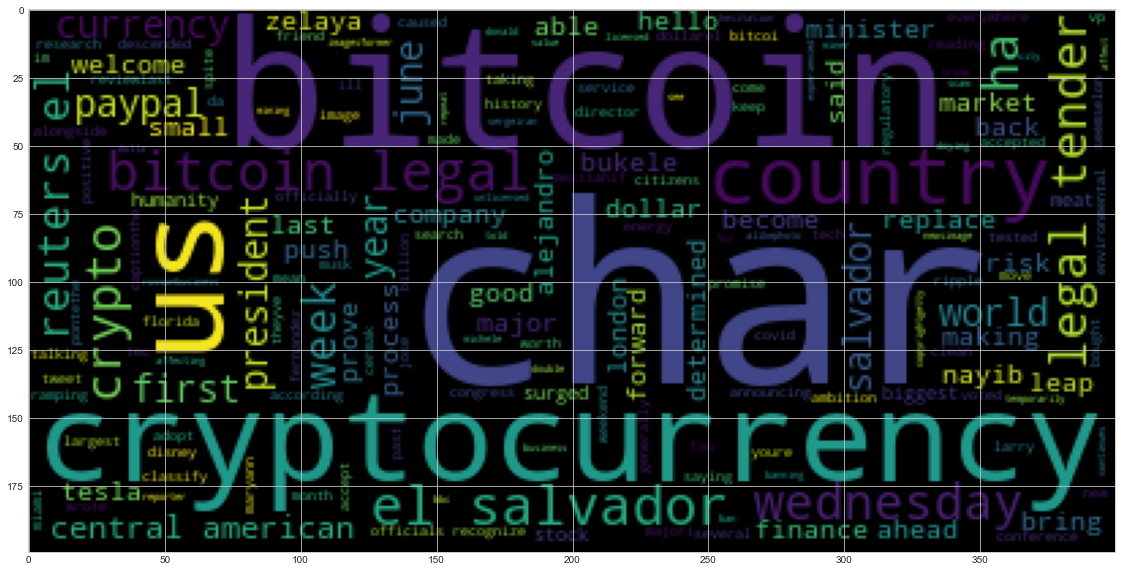

In [118]:
# Generate the Bitcoin word cloud
corpus = btc_df["text"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)
plt.savefig('btc_wc.png')

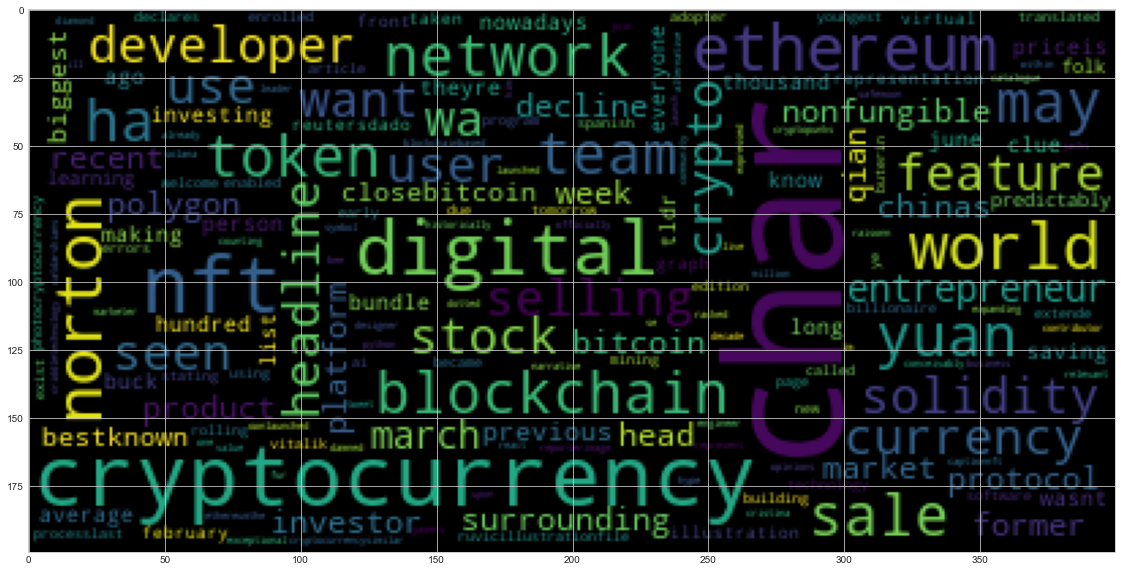

In [119]:
# Generate the Ethereum word cloud
corpus = eth_df["text"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)
plt.savefig('eth_wc.png')

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [103]:
import spacy
from spacy import displacy

In [104]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [105]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [108]:
# Concatenate all of the Bitcoin text together
btc_text = btc_df["text"].str.cat()

In [111]:
# Run the NER processor on all of the text
doc = nlp(btc_text)
# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [112]:
# Render the visualization
displacy.render(doc, style='ent')

In [113]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

["El Salvador's", 'US', 'El Salvador', 'Miami', 'Florida', 'US', 'US', 'Iran', 'U.S.', 'El Salvador', 'U.S.', 'El Salvador', 'El Salvador', 'El Salvador', 'U.S.', 'US', 'Indonesia', 'Dogecoin']


---

### Ethereum NER

In [114]:
# Concatenate all of the Ethereum text together
eth_text = eth_df["text"].str.cat()

In [115]:
# Run the NER processor on all of the text
doc = nlp(eth_text)
# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [116]:
# Render the visualization
displacy.render(doc, style='ent')

In [117]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['Indonesia', 'China', 'China']


---